In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [3]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [4]:
#Displaying first five rows
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P4C55K,King,Bothell,WA,98011.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0.0,1.0,249382416,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,KNDCE3LG1K,Thurston,Olympia,WA,98502.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,22.0,102638791,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJYGDEE8L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,112603774,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP0F,Thurston,Olympia,WA,98506.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,187006893,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,WA1E2AFY8R,King,Seattle,WA,98119.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,36.0,271736741,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [5]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
#Count missing values
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [10]:
df.shape

(223496, 17)

In [11]:
#Handling missing values
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [13]:
df.shape

(223496, 17)

In [14]:
#Remove unnecessary columns
df.drop(columns=["VIN (1-10)", "DOL Vehicle ID", "State", "City", "Vehicle Location", "Legislative District"],inplace=True)

In [15]:
df["Vehicle Age"] = 2025 - df["Model Year"]

In [16]:
# Aggregate data at county level
agg_dict = {
    "Model Year": "median",  # Typical model year per county
    "Electric Range": "median",  # Median electric range in each county
    "Base MSRP": "median",  # Median price in each county
    "Vehicle Age": "median",  # Median vehicle age per county
    "Make": lambda x: x.mode()[0],  # Most common EV manufacturer
    "Model": lambda x: x.mode()[0],  # Most common EV model
    "Electric Vehicle Type": lambda x: x.mode()[0],  # Most common type
    "Electric Utility": lambda x: x.mode()[0],  # Most common utility provider
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility": lambda x: x.mode()[0],  # Most common CAFV status
    "County": "count"  # Number of EVs per county (target variable)
}


In [17]:
agg_df = df.groupby("County").agg(agg_dict).rename(columns={"County": "EV_Count"}).reset_index()

In [18]:
agg_df.head()

,County,Model Year,Electric Range,Base MSRP,Vehicle Age,Make,Model,Electric Vehicle Type,Electric Utility,Clean Alternative Fuel Vehicle (CAFV) Eligibility,EV_Count
0,Adams,2022.0,0.0,0.0,3.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,Eligibility unknown as battery range has not b...,77
1,Asotin,2022.0,12.5,0.0,3.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,Eligibility unknown as battery range has not b...,90
2,Benton,2022.0,13.0,0.0,3.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,Eligibility unknown as battery range has not b...,2892
3,Chelan,2022.0,0.0,0.0,3.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),PUD NO 1 OF CHELAN COUNTY,Eligibility unknown as battery range has not b...,1355
4,Clallam,2022.0,19.0,0.0,3.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,Eligibility unknown as battery range has not b...,1346


In [19]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoders = {}
categorical_features = ["Make", "Model", "Electric Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Utility"]
for col in categorical_features:
    le = LabelEncoder()
    agg_df[col] = le.fit_transform(agg_df[col])
    label_encoders[col] = le

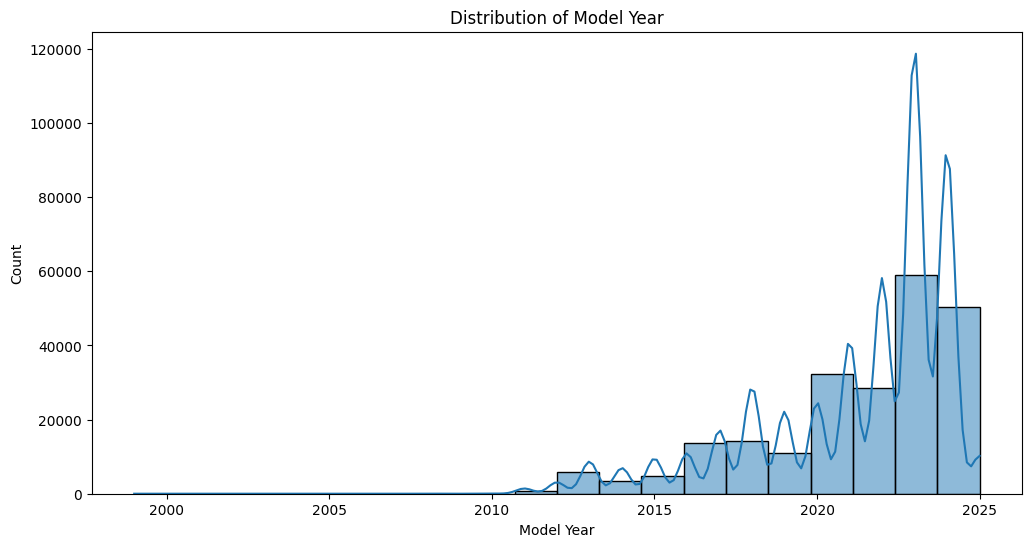

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Model Year'], bins=20, kde=True)
plt.title('Distribution of Model Year')
plt.show()

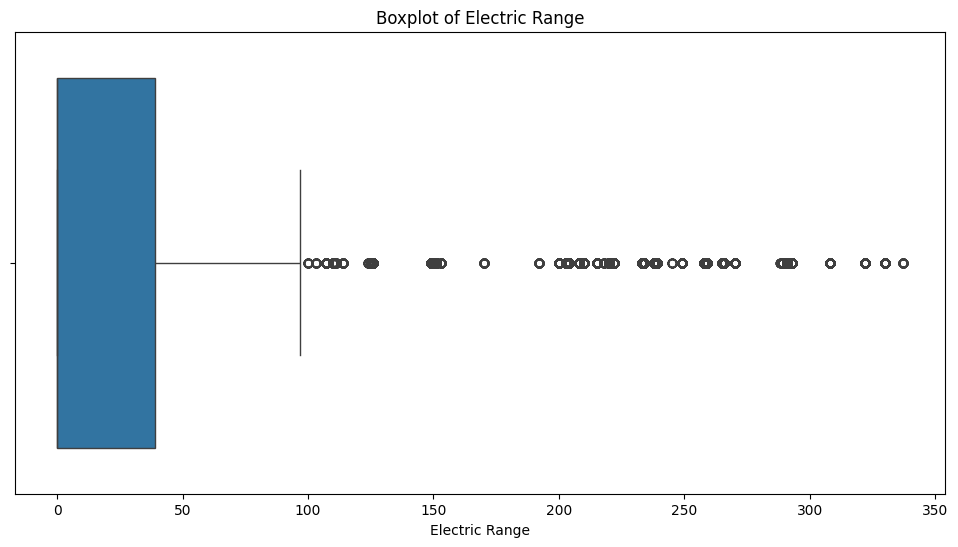

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.show()

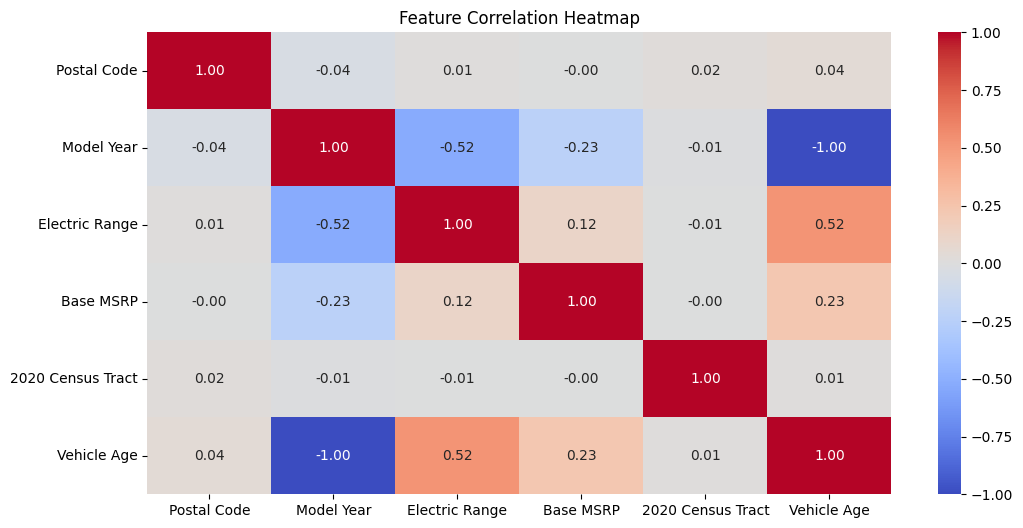

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [28]:
# Standardization of numerical features
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
numeric_features = ["Model Year", "Electric Range", "Base MSRP", "Vehicle Age"]
agg_df[numeric_features] = scaler.fit_transform(agg_df[numeric_features])

In [30]:
agg_df.head()

,County,Model Year,Electric Range,Base MSRP,Vehicle Age,Make,Model,Electric Vehicle Type,Electric Utility,Clean Alternative Fuel Vehicle (CAFV) Eligibility,EV_Count
0,Adams,0.149997,-0.765927,0.0,-0.149997,1,3,0,1,1,77
1,Asotin,0.149997,0.434682,0.0,-0.149997,1,3,0,3,1,90
2,Benton,0.149997,0.482707,0.0,-0.149997,1,3,0,8,1,2892
3,Chelan,0.149997,-0.765927,0.0,-0.149997,1,4,0,22,1,1355
4,Clallam,0.149997,1.058999,0.0,-0.149997,1,4,0,9,1,1346


In [31]:
# Splitting data into train-test sets
from sklearn.model_selection import train_test_split

In [32]:
X = agg_df.drop(columns=["EV_Count", "County"])
y = agg_df["EV_Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [36]:
best_rf = rf_grid_search.best_estimator_

In [37]:
rf_y_pred = best_rf.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("RandomForest Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, rf_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_y_pred))}")
print(f"R2 Score: {r2_score(y_test, rf_y_pred)}\n")

RandomForest Regression Results:
MAE: 13538.718041424669
MSE: 542844786.7798595
RMSE: 23299.0297390226
R2 Score: -5.368478267161419



**Decision Tree Regressor**

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dt_params = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [41]:
best_dt = dt_grid_search.best_estimator_

In [42]:
dt_y_pred = best_dt.predict(X_test)

In [43]:
print("DecisionTree Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, dt_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, dt_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, dt_y_pred))}")
print(f"R2 Score: {r2_score(y_test, dt_y_pred)}\n")

DecisionTree Regression Results:
MAE: 19475.25
MSE: 1551069281.9012346
RMSE: 39383.61692253817
R2 Score: -17.19663972688292



**Support Vector Regressor**

In [44]:
from sklearn.svm import SVR

In [45]:
svr_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "epsilon": [0.1, 0.2, 0.5]
}

svr_grid_search = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [46]:
best_svr = svr_grid_search.best_estimator_

In [47]:
svr_y_pred = best_svr.predict(X_test)

In [48]:
print(f"MAE: {mean_absolute_error(y_test, svr_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, svr_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, svr_y_pred)}\n")

MAE: 7352.1333939705655
MSE: 134275519.30162358
RMSE: 11587.731413077521
R2 Score: -0.5752766671239775



**Linear Regressor**

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred_lr = lr_model.predict(X_test)

In [78]:
print("Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}\n")

Linear Regression Results:
MAE: 27574.723933215308
MSE: 2495063366.2565503
RMSE: 49950.609268121545
R2 Score: -28.27127092341267



**Ridge Regressor**

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [51]:
best_ridge = ridge_grid_search.best_estimator_

In [52]:
ridge_y_pred = best_ridge.predict(X_test)

In [53]:
print("Ridge Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, ridge_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, ridge_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ridge_y_pred))}")
print(f"R2 Score: {r2_score(y_test, ridge_y_pred)}\n")

Ridge Regression Results:
MAE: 7630.690746412385
MSE: 87376316.53420696
RMSE: 9347.529969687552
R2 Score: -0.02507049245804671



**Lasso Regressor**

In [54]:
from sklearn.linear_model import Lasso

In [55]:
lasso_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [56]:
best_lasso = lasso_grid_search.best_estimator_

In [57]:
lasso_y_pred = best_lasso.predict(X_test)

In [ ]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(random_state=42)

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

In [59]:
print("Lasso Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, lasso_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, lasso_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lasso_y_pred)}\n")

Lasso Regression Results:
MAE: 38455.2368392154
MSE: 6254120245.218446
RMSE: 79082.99592970948
R2 Score: -72.37130213251898



**AdaBoostRegressor**

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [61]:
adaboost_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
}

adaboost_grid_search = GridSearchCV(AdaBoostRegressor(random_state=42), adaboost_params, cv=5, scoring='r2', n_jobs=-1)
adaboost_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [62]:
best_adaboost = adaboost_grid_search.best_estimator_

In [63]:
adaboost_y_pred = best_adaboost.predict(X_test)

In [64]:
print("AdaBoost Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, adaboost_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, adaboost_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, adaboost_y_pred))}")
print(f"R2 Score: {r2_score(y_test, adaboost_y_pred)}\n")

AdaBoost Regression Results:
MAE: 5976.722763347763
MSE: 102269896.77428286
RMSE: 10112.857992391808
R2 Score: -0.19979712590661003



**Gradient Boosting Regressor**

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
gbr_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10]
}

gbr_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5, scoring='r2', n_jobs=-1)
gbr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [67]:
best_gbr = gbr_grid_search.best_estimator_

In [68]:
gbr_y_pred = best_gbr.predict(X_test)

In [69]:
print("Gradient Boosting Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, gbr_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, gbr_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, gbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, gbr_y_pred)}\n")

Gradient Boosting Regression Results:
MAE: 14784.997805619998
MSE: 680464720.0285503
RMSE: 26085.718698716166
R2 Score: -6.982990509641351



**XGB Regressor**

In [70]:
from xgboost import XGBRegressor

In [71]:
xgb_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10]
}

xgb_grid_search = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [72]:
best_xgb = xgb_grid_search.best_estimator_

In [73]:
xgb_y_pred = best_xgb.predict(X_test)

In [74]:
print("XGBoost Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, xgb_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, xgb_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}")
print(f"R2 Score: {r2_score(y_test, xgb_y_pred)}\n")

XGBoost Regression Results:
MAE: 11535.7509765625
MSE: 321512960.0
RMSE: 17930.782470377584
R2 Score: -2.7718851566314697



In [79]:
results = {
    'Model': ['RandomForest', 'DecisionTree', 'SVR', 'LinearRegression', 'Ridge', 'Lasso', 'AdaBoost', 'GradientBoosting', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test, rf_y_pred),
            mean_absolute_error(y_test, dt_y_pred),
            mean_absolute_error(y_test, svr_y_pred),
            mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, ridge_y_pred),
            mean_absolute_error(y_test, lasso_y_pred),
            mean_absolute_error(y_test, adaboost_y_pred),
            mean_absolute_error(y_test, gbr_y_pred),
            mean_absolute_error(y_test, xgb_y_pred)],
    'MSE': [mean_squared_error(y_test, rf_y_pred),
            mean_squared_error(y_test, dt_y_pred),
            mean_squared_error(y_test, svr_y_pred),
            mean_squared_error(y_test, y_pred_lr),
            mean_squared_error(y_test, ridge_y_pred),
            mean_squared_error(y_test, lasso_y_pred),
            mean_squared_error(y_test, adaboost_y_pred),
            mean_squared_error(y_test, gbr_y_pred),
            mean_squared_error(y_test, xgb_y_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, rf_y_pred)),
             np.sqrt(mean_squared_error(y_test, dt_y_pred)),
             np.sqrt(mean_squared_error(y_test, svr_y_pred)),
             np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, ridge_y_pred)),
             np.sqrt(mean_squared_error(y_test, lasso_y_pred)),
             np.sqrt(mean_squared_error(y_test, adaboost_y_pred)),
             np.sqrt(mean_squared_error(y_test, gbr_y_pred)),
             np.sqrt(mean_squared_error(y_test, xgb_y_pred))],
    'R2 Score': [r2_score(y_test, rf_y_pred),
                 r2_score(y_test, dt_y_pred),
                 r2_score(y_test, svr_y_pred),
                 r2_score(y_test, y_pred_lr),
                 r2_score(y_test, ridge_y_pred),
                 r2_score(y_test, lasso_y_pred),
                 r2_score(y_test, adaboost_y_pred),
                 r2_score(y_test, gbr_y_pred),
                 r2_score(y_test, xgb_y_pred)]
}

results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,RandomForest,13538.718041,5.428448e+08,23299.029739,-5.368478
1,DecisionTree,19475.250000,1.551069e+09,39383.616923,-17.196640
2,SVR,7352.133394,1.342755e+08,11587.731413,-0.575277
3,LinearRegression,27574.723933,2.495063e+09,49950.609268,-28.271271
4,Ridge,7630.690746,8.737632e+07,9347.529970,-0.025070
5,Lasso,38455.236839,6.254120e+09,79082.995930,-72.371302
6,AdaBoost,5976.722763,1.022699e+08,10112.857992,-0.199797
7,GradientBoosting,14784.997806,6.804647e+08,26085.718699,-6.982991
8,XGBoost,11535.750977,3.215130e+08,17930.782470,-2.771885


AdaBoost Regressor has the lowest MAE (5976.72) and relatively low RMSE (10112.86).
Ridge Regression also performs well, with MAE (7630.69) and RMSE (9347.53), but it has a slightly better R² score than AdaBoost.
Thus, Ridge Regression or AdaBoost Regressor seems to be the best choice for predicting EV count